<hr>
<hr><h3><b>➡️Task 9: Hand Written Equation solver ⬅️</b>
<hr>
<hr>

- <b>➡️Importing libraries⬅️</b>

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

- <b>➡️Reading dataset⬅️</b>

In [21]:
data=pd.read_csv("train_final.csv")
data.shape

(156617, 785)

In [22]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,10
1,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,10
2,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,10
3,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,10
4,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,10


In [23]:
labels=data[['784']]
data.drop(data.columns[[784]],axis=1,inplace=True)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0
1,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0
2,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0
3,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0
4,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0


In [24]:
import keras
from keras.models import Model
from keras import optimizers
from keras.datasets import mnist
from keras.layers import Input, Dense
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras.utils.np_utils import to_categorical
from keras import backend as K
from keras.models import model_from_json

In [25]:
labels = np.array(labels)

In [26]:
category=to_categorical(labels,num_classes=13)
print(category[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [27]:
tp = data.to_numpy()
x_train = tp.reshape(tp.shape[0] , 28,28,1)
tp.shape

(156617, 784)

In [28]:
x_train.shape

(156617, 28, 28, 1)

In [29]:
l=[]
for i in range(50621):
    l.append(np.array(data[i:i+1]).reshape(1,28,28))
    
np.random.seed(7)

- <b>➡️Training the model⬅️</b>

In [30]:
model = Sequential()

In [31]:
model.add(Conv2D(32, (3,3), input_shape=(28, 28,1), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(15, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(13, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train , category , epochs=1 , batch_size=200 , shuffle= True , verbose= 1)

784/784 [==============================] - 151s 186ms/step - loss: 0.4237 - accuracy: 0.8943


In [32]:
model_json = model.to_json()
with open("model_final.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("model_final.h5")

In [33]:
json_file = open('model_final.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights("model_final.h5")

- <b>➡️Experimenting⬅️</b>

In [53]:
img = cv2.imread('img.jpg',cv2.IMREAD_GRAYSCALE)

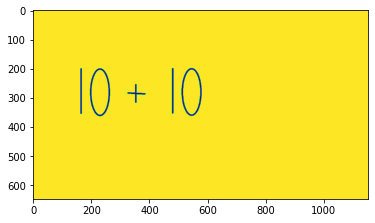

In [54]:
plt.imshow(img)
plt.show()

In [55]:
if img is not None:
    #images.append(img)
    img=~img
    ret,thresh=cv2.threshold(img,127,255,cv2.THRESH_BINARY)
    ctrs,ret=cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    cnt=sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0])
    w=int(28)
    h=int(28)
    train_data=[]
    print(len(cnt))
    rects=[]
    for c in cnt :
        x,y,w,h= cv2.boundingRect(c)
        rect=[x,y,w,h]
        rects.append(rect)
    print(rects)
    bool_rect=[]
    for r in rects:
        l=[]
        for rec in rects:
            flag=0
            if rec!=r:
                if r[0]<(rec[0]+rec[2]+10) and rec[0]<(r[0]+r[2]+10) and r[1]<(rec[1]+rec[3]+10) and rec[1]<(r[1]+r[3]+10):
                    flag=1
                l.append(flag)
            if rec==r:
                l.append(0)
        bool_rect.append(l)
    print(bool_rect)
    dump_rect=[]
    for i in range(0,len(cnt)):
        for j in range(0,len(cnt)):
            if bool_rect[i][j]==1:
                area1=rects[i][2]*rects[i][3]
                area2=rects[j][2]*rects[j][3]
                if(area1==min(area1,area2)):
                    dump_rect.append(rects[i])
    print(len(dump_rect)) 
    final_rect=[i for i in rects if i not in dump_rect]
    print(final_rect)
    for r in final_rect:
        x=r[0]
        y=r[1]
        w=r[2]
        h=r[3]
        im_crop =thresh[y:y+h+10,x:x+w+10]
        

        im_resize = cv2.resize(im_crop,(28,28))


        im_resize=np.reshape(im_resize,(28,28,1))
        train_data.append(im_resize)

7
[[163, 200, 5, 156], [196, 200, 69, 164], [200, 204, 61, 156], [325, 254, 62, 64], [478, 199, 5, 156], [511, 199, 69, 164], [515, 203, 61, 156]]
[[0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 1, 0]]
2
[[163, 200, 5, 156], [196, 200, 69, 164], [325, 254, 62, 64], [478, 199, 5, 156], [511, 199, 69, 164]]


In [56]:
s=''
for i in range(len(train_data)):
    train_data[i]=np.array(train_data[i])
    train_data[i]=train_data[i].reshape(1,28,28,1)
    result=np.argmax(loaded_model.predict(train_data[i]), axis=-1)
    if(result[0]==10):
        s=s+'-'
    if(result[0]==11):
        s=s+'+'
    if(result[0]==12):
        s=s+'*'
    if(result[0]==0):
        s=s+'0'
    if(result[0]==1):
        s=s+'1'
    if(result[0]==2):
        s=s+'2'
    if(result[0]==3):
        s=s+'3'
    if(result[0]==4):
        s=s+'4'
    if(result[0]==5):
        s=s+'5'
    if(result[0]==6):
        s=s+'6'
    if(result[0]==7):
        s=s+'7'
    if(result[0]==8):
        s=s+'8'
    if(result[0]==9):
        s=s+'9'
    

1/1 [==============================] - 0s 17ms/step


In [57]:
eval(s)

20